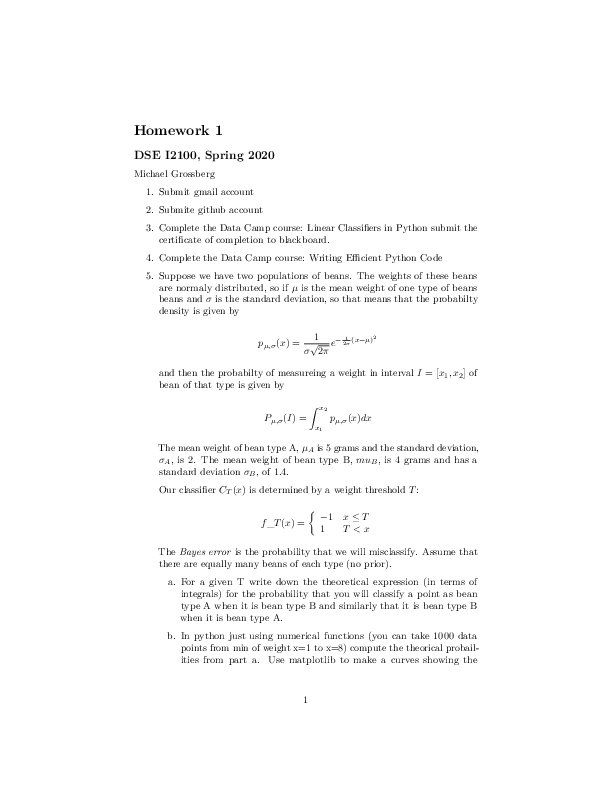

In [32]:
import wand
from wand.image import Image as WImage
image = WImage(filename='hw1.pdf')
image

In [33]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [34]:
mu_A = 5 #grams
sig_A = 2 #unit

mu_B = 4 #grams
sig_B = 1.4 #unit

In [35]:
def threshold(x,T):
    if x <= T:
        return -1
    return 1

# #5 Bayes Theorem– 
## Conditional Probability

# $$P(Y|X) = \frac{P(X|Y) * P(Y)}{P(X)}$$

# $$Posterior = \frac{Likelihood * Prior}{Evidence}$$

# #5a Bayes Error – 
## The probability we'll misclassify
# $$1- \Sigma_{C_i  ≠ C_{max, x}} \int \limits_{x ∈ H_i} [P(C_i|x)* p(x)]\ dx $$

https://en.wikipedia.org/wiki/Bayes_error_rate

In [36]:
xA = np.arange(mu_A*-3.5*sig_A,mu_A*3.5*sig_A,0.001)
xB = np.arange(mu_B*-3.5*sig_B,mu_B*3.5*sig_B,0.001)

In [37]:
yA = (np.e**(-(xA-mu_A)**2))/(np.pi*2*sig_A)**.5
yB = (np.e**(-(xB-mu_B)**2))/(np.pi*2*sig_B)**.5

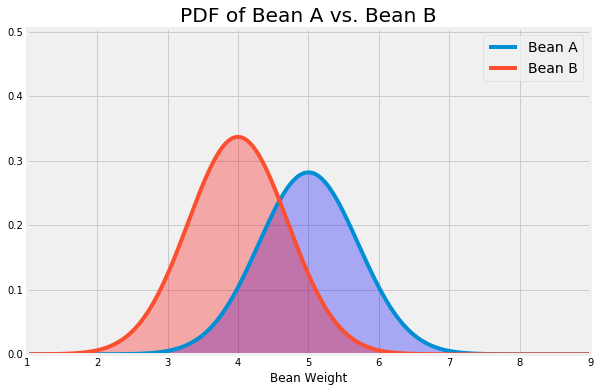

In [38]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(xA,yA)

ax.fill_between(xA,yA,0, alpha=0.3, color='b')
#ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4+mu_A,4+mu_A])
ax.set_xlabel('Bean Weight')
ax.set_ylim(ymin=0,ymax=1.5*max(max(yA),max(yB)))
ax.set_title('PDF of Bean A vs. Bean B')
ax.legend(['Bean A'])

ax.plot(xB,yB)
ax.fill_between(xB,yB,0, alpha=0.3, color='r')
ax.legend(['Bean A','Bean B'])

#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [39]:
np.array((max(yA)))

array(0.28209479)

In [40]:
np.array((max(yB)))

array(0.33716777)

In [41]:
max(max(yA),max(yB))

0.3371677656723677

In [42]:
def normFunc(x,mu,sig):
    return (np.e**(-(x-mu)**2))/(np.pi*2*sig)**.5

# typeII_domain = np.arange(1,8,.001)
# misClassify_A = normFunc(typeII_domain,mu_B,sig_B)
# misClassify_B = normFunc(typeII_domain,mu_A,sig_A)

# cumsum = sum(.001*np.minimum(misClassify_B,misClassify_A))

# print(cumsum)

In [43]:
from numpy import random as nr
nr.seed = 100

In [44]:
#nr.randn?

In [45]:
#nr.standard_normal?

In [46]:
set_a = mu_A + sig_A * nr.randn(5000)
set_b = mu_B + sig_B * nr.randn(5000)

In [47]:
set_a_prime = set_a[set_a>=1]
set_a_prime = set_a_prime[set_a_prime<=8]
len(set_a_prime)

4541

In [48]:
set_b_prime = set_b[set_a>=1]
set_b_prime = set_b_prime[set_b_prime<=8]
len(set_b_prime)

4892

In [49]:
set_beans = [ (a, 'A') for a in set_a_prime]
set_beans = set_beans + [(b, 'B') for b in set_b_prime]
len(set_beans)

9433

In [50]:
trial = [['A','B'][nr.randint(0,2)] for i in range(1000)]
len(trial)

1000

# Simulated Bayes Error

In [51]:
t = 4
err = 0.0001

while abs(normFunc(t,mu_A,sig_A)-normFunc(t,mu_B,sig_B))>=err:
    t += 0.001
print('Optimal Threshold is:',t)

Optimal Threshold is: 4.589000000000197


## Optimal threshold is 
### 4.589 lbs

In [52]:
misClass = 0
nr.shuffle(set_beans)

for i in range(1000):
    x = set_beans[i][0]
    pool = set_beans[i][1]
    if x <= t and pool=='A':
        misClass+=1
    elif x >= t and pool=='B':
        misClass+=1

print('Simulated Bayes error is:',misClass/1000)

Simulated Bayes error is: 0.39


## Bayes error
## ~38%

# Making Fake data

## #6a Using sklearn.datasets.make_blobs
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [53]:
from sklearn.datasets import make_blobs

In [57]:
centers = [[1, 1], [-1, -1]]
X, y = make_blobs(n_samples=100, n_features=2, 
        centers=centers, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

In [58]:
print(X.shape)
y

(100, 2)


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])